# Reconhecimento de sinalização de trânsito


Neste projeto, usaremos uma Rede Neural Convolucional (Convolutional Neural Network) para construir, treinar e testar um modelo de reconhecimento de sinais de trânsito. Utilizaremos as bibliotecas TensorFlow e Keras para construir esse modelo. Trata-se de um problema de classificação multiclasse. Esse modelo pode ser usado em carros inteligentes.

A primeira parte, até a importação de pacotes, é uma serie de comandos que rodam em Google Colab para criação de pastas, download de arquivos diretamente peloo servidor do Kaggle e extração de pastas compactadas. Pode apenas executá-las.

In [ ]:
# Run this cell and select the kaggle.json file downloaded from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pianalytix","key":"e384e332b6a329a802893747ab6d06db"}'}

We will start by connecting to Kaggle using Kaggle API which can be downloaded from your Kaggle account's settings and uploading it here(upload box).

In [1]:
# Next, install the Kaggle API client.
!pip install -q kaggle

Installing kaggle api using pip

In [2]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

A sintaxe do comando est� incorreta.
'cp' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'chmod' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


Setting up Kaggle using Kaggle API.

In [3]:
# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

c:\Users\marioestevao\Desktop\estudos\!00-Projects-Udemy\4 - trafic sign\traffic_sign_dataset


To store the data we will create a new directory and make it as current working directory.

In [4]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          85612        977  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          11180        252  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            398          9  0.75             
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

Searching Kaggle for the required dataset using search option(-s) with title 'dogbreedidfromcomp'. We can also use different search options like searching competitions, notebooks, kernels, datasets, etc.

In [5]:
# Downloading dataset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd ..


c:\Users\marioestevao\Desktop\estudos\!00-Projects-Udemy\4 - trafic sign



  0%|          | 0.00/612M [00:00<?, ?B/s]
  0%|          | 1.00M/612M [00:00<07:41, 1.39MB/s]
  0%|          | 2.00M/612M [00:00<03:49, 2.78MB/s]
  1%|          | 4.00M/612M [00:00<01:46, 5.97MB/s]
  1%|▏         | 8.00M/612M [00:01<00:50, 12.7MB/s]
  2%|▏         | 10.0M/612M [00:01<00:49, 12.8MB/s]
  2%|▏         | 13.0M/612M [00:01<00:37, 16.7MB/s]
  3%|▎         | 17.0M/612M [00:01<00:31, 20.1MB/s]
  3%|▎         | 21.0M/612M [00:01<00:25, 24.2MB/s]
  4%|▍         | 24.0M/612M [00:01<00:24, 25.7MB/s]
  5%|▍         | 28.0M/612M [00:01<00:21, 28.5MB/s]
  5%|▌         | 32.0M/612M [00:01<00:19, 30.8MB/s]
  6%|▌         | 36.0M/612M [00:02<00:19, 31.0MB/s]
  7%|▋         | 40.0M/612M [00:02<00:18, 32.2MB/s]
  7%|▋         | 44.0M/612M [00:02<00:17, 33.3MB/s]
  8%|▊         | 48.0M/612M [00:02<00:18, 31.6MB/s]
  8%|▊         | 52.0M/612M [00:02<00:17, 32.7MB/s]
  9%|▉         | 56.0M/612M [00:02<00:17, 33.6MB/s]
 10%|▉         | 60.0M/612M [00:02<00:18, 31.4MB/s]
 10%|█         | 64.

After searching the data next step would be downloading the data into collab notebook using references found in search option.

We will unzip the data which is downloaded and remove the irrelevant files.

In [6]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

'unzip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


### Importando bibliotecas

In [1]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split

Aqui, pode ser que você tenha um problema relacionado ao pacote protobuf. Use o comando pip install protobuf==3.20.1 e reinicie o Kernel para continuar

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

Vamos visuallizar algumas imagens de sinais de trânsito do conjunto de dados de teste. Podemos observar que as dimensões das imagens estão irregulares.

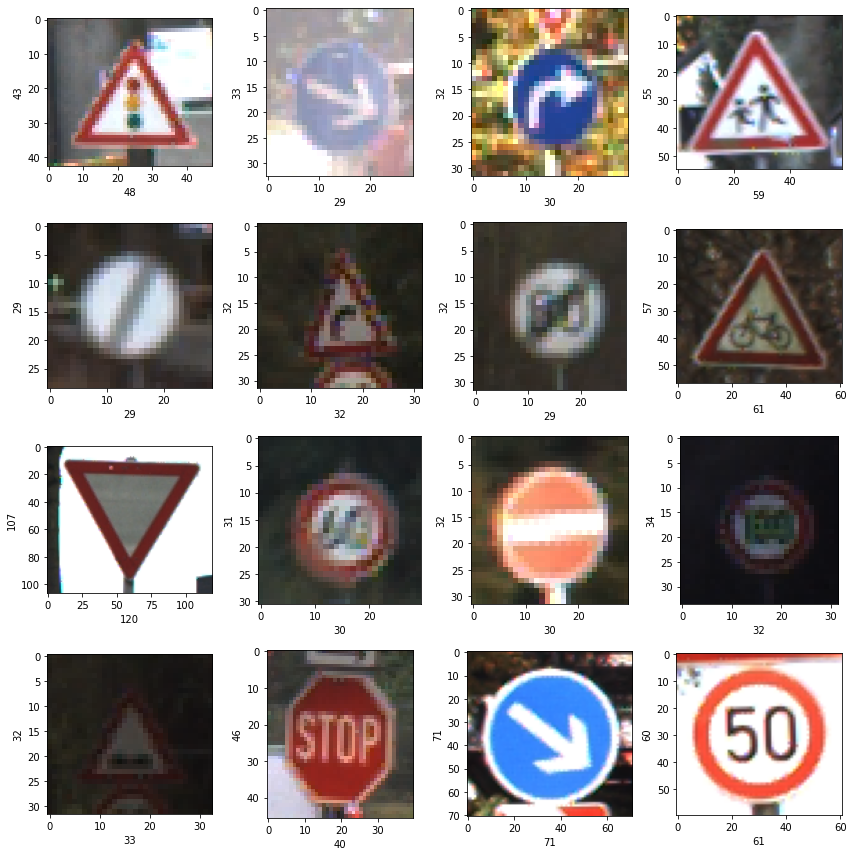

In [3]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Para continuarmos o processamento, será necessário ter imagens com as mesmas dimensões. Portanto, começaremos armazenando as dimensões de todas as imagens do conjunto de dados de treinamento para as 43 classes.

In [4]:
# As size of images are different we have to make them equal so we will take mean of dimensions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])


Agora vamos calcular o valor médio de ambas as dimensões e analisá-las. Aqui, podemos observar que (50, 50) é a forma média para todas as imagens.

In [5]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773



Agora iremos redimensionar as imagens para (50, 50) e também armazenar os identificadores de suas respectivas classes.

In [6]:
# Now we will reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

Agora iremos converter todas as imagens em um array NumPy e normalizá-las.

In [7]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

Vamos armazenar os identificadores de classe em um array NumPy e imprimir o shape. Podemos observar que existem 39209 identificadores de classe.






In [8]:
label_id = np.array(label_id)
label_id.shape

(39209,)

Por último, checamos o shape das imagens. Temos 39209 images com um formato 50x50

In [ ]:
images.shape

(39209, 50, 50, 3)

Agora iremos olhar quantas vezes cada categoria apareceu, para checar se o dataset está desbalanceado. Como os valores resultantes estão em faixas parecidas, podemos ver que os dados estão balanceados


In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

### Treinamento do modelo

Vamos dividir nosso conjunto de dados de treino e teste numa proporção de 80% para treinamento e 20% para validação

In [10]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

Vamos fazer um One-Hot Encoding nas nossas colunas categóricas, mas, ao contrário do método tradicional, faremos isso usando um modelo do próprio Keras

In [11]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

#### Atenção, a partir daqui tentarei explicar melhor o que está acontecendo no código e o porque da escolha de cada parâmetro. Esses conceitos são um pouco complexos, e para entender melhor a teoria por cada um deles, recomendo que estude o básico sobre deep learning primeiro.

Agora vamos definir a arquitetura do modelo. Neste trecho de código, estamos configurando as camadas do modelo com informações importantes, como forma de entrada, tamanho do kernel e ativação

O código começa criando um modelo sequencial usando `Sequential()`.

A primeira camada adicionada é uma camada convolucional (`Conv2D`) com 64 filtros, tamanho de kernel de (3,3), forma de entrada igual à forma dos dados de treinamento (`x_train.shape[1:]`), função de ativação ReLU e preenchimento (padding) 'same'. Essa camada realiza a convolução dos dados de entrada para extrair características relevantes. O padding 'same' garante que a saída da convolução tenha a mesma forma da entrada.

Em seguida, é adicionada uma camada de pooling máxima (`MaxPool2D`) com um tamanho de pool de (2,2). Essa camada reduz a dimensionalidade espacial dos dados, mantendo as características mais importantes.

Depois, é adicionada uma camada de dropout (`Dropout`) com uma taxa de 0.5. Essa camada ajuda a evitar o overfitting, desligando aleatoriamente unidades durante o treinamento.

Esses passos são repetidos para adicionar mais uma camada convolucional, camada de pooling máxima e camada de dropout.

Em seguida, as camadas são achatadas (`Flatten`) para converter os dados em um vetor unidimensional, preparando-os para a entrada em uma camada densa (`Dense`).

A camada densa tem 128 neurônios com função de ativação ReLU e é seguida por outra camada de dropout.

Finalmente, a última camada densa possui 43 neurônios (correspondentes às 43 classes de sinais de trânsito) com função de ativação softmax. A função softmax atribui probabilidades às diferentes classes, permitindo a classificação do sinal de trânsito.


In [12]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

Compilando o modelo usando métricas, otimizador e função de perda conforme necessário e imprimindo o resumo do modelo.

A função compile é usada para configurar o modelo para o treinamento. Estamos especificando a função de perda como sparse_categorical_crossentropy, o otimizador como adam e as métricas a serem avaliadas durante o treinamento, que neste caso é a acurácia.

A função summary imprime um resumo do modelo.

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

Agora iremos treinar o modelo e observar como ele está sendo treinado em cada `epoch`

Durante o treinamento, o modelo irá iterar sobre os dados de treinamento em lotes de tamanho 128, calculando a função de perda e atualizando os pesos do modelo com base no algoritmo de otimização escolhido (no caso, o otimizador Adam). A cada época, o modelo também será avaliado nos dados de validação e as métricas, como a acurácia, serão calculadas e exibidas.

In [14]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 46s - loss: 2.5595 - accuracy: 0.2987 - val_loss: 1.3248 - val_accuracy: 0.6357 - 46s/epoch - 187ms/step
Epoch 2/10
246/246 - 47s - loss: 1.2670 - accuracy: 0.6004 - val_loss: 0.5299 - val_accuracy: 0.8789 - 47s/epoch - 191ms/step
Epoch 3/10
246/246 - 46s - loss: 0.8390 - accuracy: 0.7302 - val_loss: 0.3386 - val_accuracy: 0.9373 - 46s/epoch - 189ms/step
Epoch 4/10
246/246 - 46s - loss: 0.6519 - accuracy: 0.7870 - val_loss: 0.2278 - val_accuracy: 0.9578 - 46s/epoch - 186ms/step
Epoch 5/10
246/246 - 45s - loss: 0.5451 - accuracy: 0.8212 - val_loss: 0.1639 - val_accuracy: 0.9662 - 45s/epoch - 184ms/step
Epoch 6/10
246/246 - 45s - loss: 0.4709 - accuracy: 0.8456 - val_loss: 0.1462 - val_accuracy: 0.9723 - 45s/epoch - 184ms/step
Epoch 7/10
246/246 - 46s - loss: 0.4224 - accuracy: 0.8608 - val_loss: 0.1111 - val_accuracy: 0.9774 - 46s/epoch - 186ms/step
Epoch 8/10
246/246 - 45s - loss: 0.3863 - accuracy: 0.8737 - val_loss: 0.1095 - val_accuracy: 0.9787 - 45s/epoch - 183

#### Extra: O que são Epochs?

Em um problema de aprendizado de máquina, uma epoch representa uma passagem completa pelos dados de treinamento durante o processo de treinamento do modelo. Durante uma epoch, o modelo percorre todos os exemplos de treinamento, calcula a função de perda, atualiza os pesos do modelo com base no algoritmo de otimização escolhido e avalia o desempenho nos dados de validação, se fornecidos.

Cada epoch é composta por um conjunto de iterações, onde cada iteração processa um lote de dados. Um lote é um subconjunto dos dados de treinamento usado para atualizar os pesos do modelo. O tamanho do lote é especificado pelo parâmetro batch_size. Após cada iteração, os pesos são atualizados para se ajustarem melhor aos dados de treinamento.

Ao executar o código acima, o modelo será treinado em 10 epochs. A cada epoch, o modelo aprenderá com os dados de treinamento, fará ajustes nos pesos e, em seguida, avaliará seu desempenho nos dados de validação. O processo é repetido por 10 epochs, permitindo que o modelo aprenda e refine sua capacidade de classificar os sinais de trânsito.

Através do uso de múltiplas epochs, o modelo tem a oportunidade de aprender com os dados de treinamento em várias passagens, melhorando gradualmente seu desempenho e aumentando sua capacidade de generalização para dados não vistos anteriormente.

O acompanhamento do treinamento em cada epoch nos permite observar como o modelo está progredindo, como a função de perda está diminuindo e como as métricas, como a acurácia, estão melhorando. Isso nos ajuda a monitorar o desempenho do modelo e ajustar os hiperparâmetros, se necessário, para obter resultados melhores.

Em seguida, vamos visualizar a precisão (accuracy) e a perda (loss) por epoch. Para isso, vamos armazenar o histórico do modelo em um dataframe do Pandas e plotar os resultados.

<AxesSubplot:>

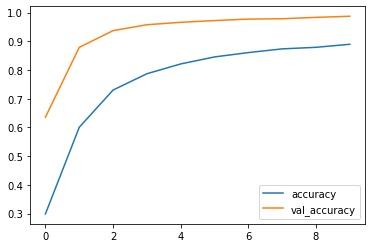

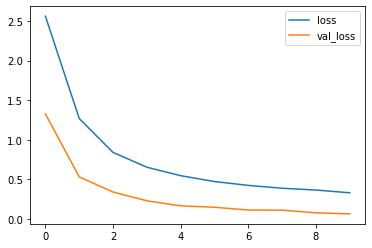

In [15]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Criando a variável que contém o caminho para o conjunto de dados de teste. Ao baixarmos o conjunto de dados, descobrimos que há um arquivo GT-final_test.csv na pasta das imagens de teste que não pode ser processado. Portanto, iremos remover esse arquivo.

In [18]:
test_path = 'traffic_sign_dataset/Test'
csv_file_path = os.path.join(test_path, 'GT-final_test.csv')

if os.path.exists(csv_file_path):
    os.remove(csv_file_path)
    print("Arquivo 'GT-final_test.csv' removido com sucesso.")
else:
    print("O arquivo 'GT-final_test.csv' não existe no diretório.")


Arquivo 'GT-final_test.csv' removido com sucesso.


O próximo passo é criar uma função para redimensionar as imagens de teste, convertendo-as em um array numpy e normalizando-as.

In [19]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

Usando a função nas imagens de teste

In [20]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)


Em seguida, iremos ler os IDs das classes do arquivo Test.csv e armazenar os valores dos IDs das classes na variável y_test.

In [21]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)


Agora iremos usar o modelo para fazer previsões em nossas imagens de teste e salvá-las em y_pred.

In [23]:
y_pred_prob = model.predict(test_images)
y_pred_prob

395/395 [==============================] - 4s 11ms/step


array([[6.09426156e-20, 2.28245998e-20, 2.22973379e-18, ...,
        2.51659491e-19, 2.43857077e-20, 5.54341136e-19],
       [5.08281164e-06, 9.99992132e-01, 7.21132551e-07, ...,
        1.67096067e-19, 6.95014091e-31, 2.18785719e-26],
       [0.00000000e+00, 6.65578332e-35, 1.91202889e-26, ...,
        1.13594745e-17, 9.09003534e-25, 3.45853346e-30],
       ...,
       [2.79670076e-06, 5.48071403e-04, 3.05166235e-03, ...,
        3.40637588e-03, 1.24340621e-03, 4.18931857e-04],
       [3.34408514e-06, 2.15059816e-04, 1.70372121e-04, ...,
        1.43078842e-06, 1.56098554e-11, 4.71226315e-07],
       [1.01092401e-09, 1.46512903e-07, 1.75071170e-06, ...,
        1.17384307e-08, 6.48600675e-08, 4.01896204e-06]], dtype=float32)

In [24]:
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred

array([16,  1, 38, ..., 38,  7, 10], dtype=int64)

**Por que a predição teve duas etapas?**

`y_pred_prob` armazena as probabilidades de cada classe para as imagens de teste, obtidas através do método predict. Em seguida, usamos a função argmax do NumPy para encontrar o índice da classe com a maior probabilidade em cada linha (imagem). O resultado final é armazenado na variável y_pred, que contém as previsões das classes.


Armazenando as labels de acordo com as classes das imagens.

In [25]:
# Storing all labels
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

Visualizando a imagem de teste

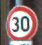

In [26]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

Comparando a label original com a predita

In [27]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [28]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)


Nosso modelo está conseguindo reconhecer as placas

## Conclusão:

Começamos baixando o conjunto de dados, pré-processando-o, criamos o modelo e descobrimos as previsões usando o modelo. Durante o pré-processamento, descobrimos que esse conjunto de dados possui 43 classes. O modelo atingiu uma precisão de mais de 95% em apenas 50 epochs, e podemos otimizá-lo ainda mais usando ajuste de hiperparâmetros para alcançar uma precisão ainda maior. 

Não esqueça: Precisões muito altas podem ser sinal de overfitting. Em futuros projetos usaremos ferramentas do próprio Keras para lidar com isso.

# Escopo:


Esse modelo pode ser usado em carros autônomos, o que lhes permitirá reconhecer automaticamente as placas de trânsito. Da mesma forma, o sistema de alerta ao motorista dentro dos carros ajudará e protegerá os motoristas ao entender as placas de trânsito ao seu redor.